In [69]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [70]:
data = pd.read_excel('data/QualidadeARO3.xlsx')
data = data.drop(columns='Ihavo')
rng = pd.date_range('1/1/2020 00:00', periods=8784, freq='1H')
data.index = rng

### 1. Antas-Espinho Analysis

/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


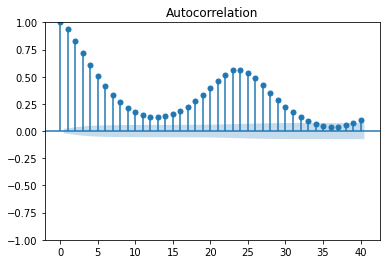

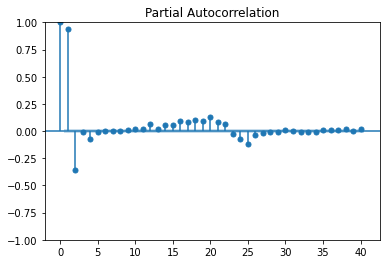

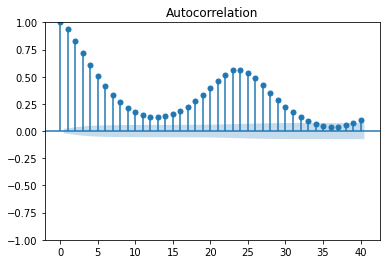

In [75]:
antas = data['Antas-Espinho']
plot_pacf(antas)
plot_acf(antas)

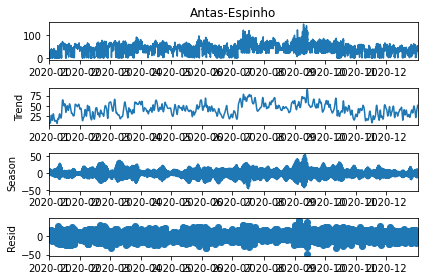

In [76]:
res = STL(antas).fit()
res.plot()
plt.show()

we see that we have a strong trend which indicates the non stationarity of the time series
thus we apply differencing to remove the trend component  

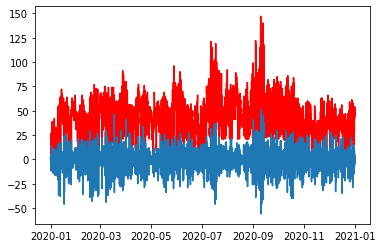

In [77]:
#antas = np.log(antas)
antas = antas.diff()
plt.plot(data.index, data['Antas-Espinho'], color='red')
plt.plot(antas)


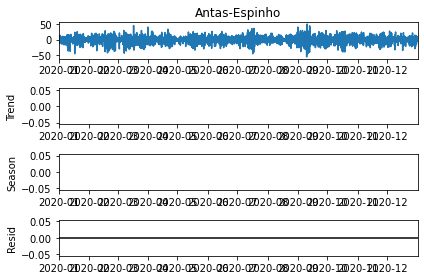

In [78]:
res = STL(antas).fit()
res.plot()
plt.show()

/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


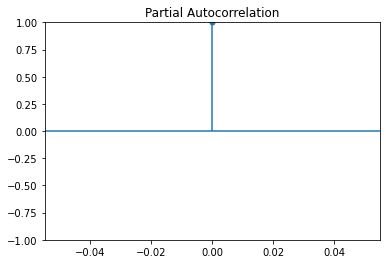

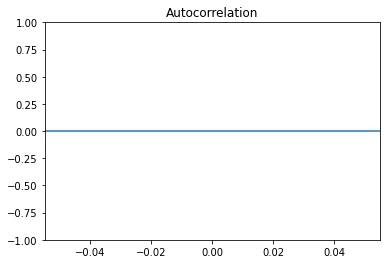

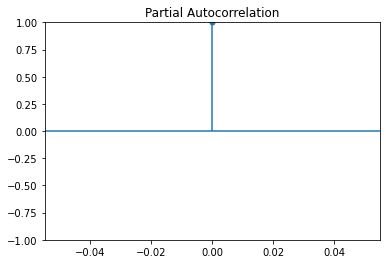

In [79]:
plot_acf(antas)
plot_pacf(antas)

### 2. Entrecampos Analysis

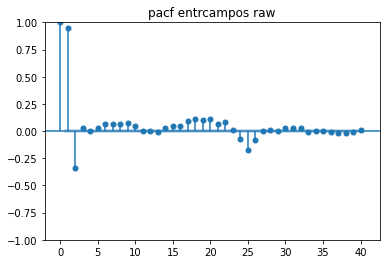

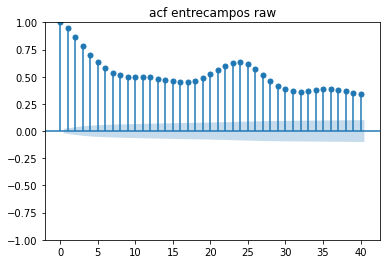

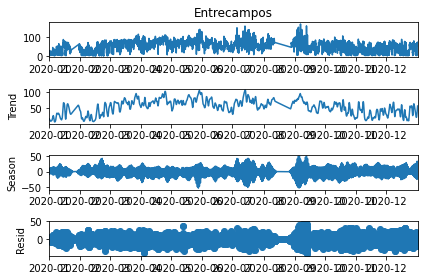

In [80]:
#entrecampos raw
entrecampos = data.Entrecampos
plot_pacf(entrecampos, title='pacf entrcampos raw')
plot_acf(entrecampos, title='acf entrecampos raw')
res = STL(entrecampos).fit()
res.plot()
plt.show()


/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


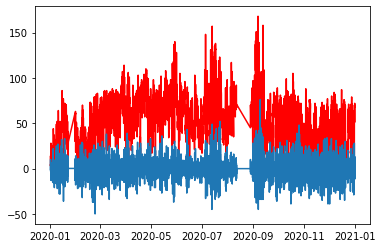

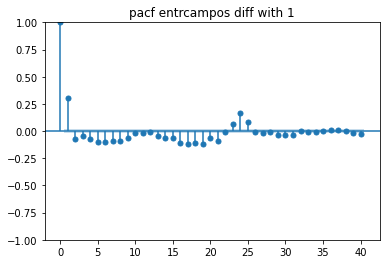

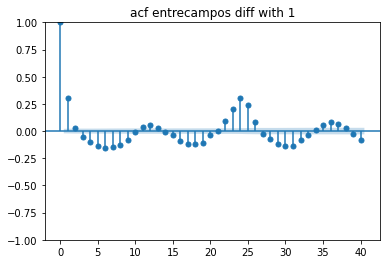

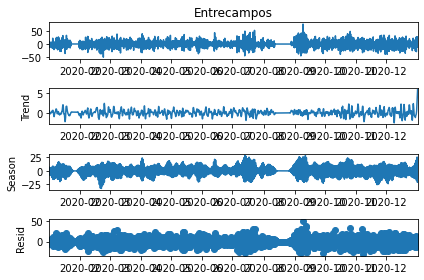

In [81]:
#entrecampos differencing 1
entrecampos = entrecampos.diff()
entrecampos = entrecampos[1:]
plt.plot(data.index, data['Entrecampos'], color='red')
plt.plot(entrecampos)

#pacf, acf plots
plot_pacf(entrecampos, title='pacf entrcampos diff with 1')
plot_acf(entrecampos, title='acf entrecampos diff with 1')
#decomposition plot
res = STL(entrecampos).fit()
res.plot()
plt.show()



/Users/marco/anaconda3/envs/ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


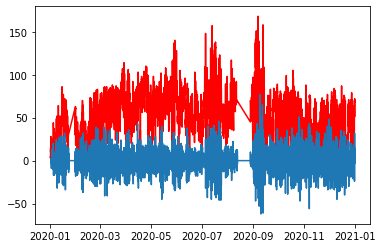

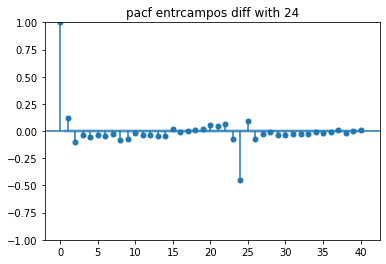

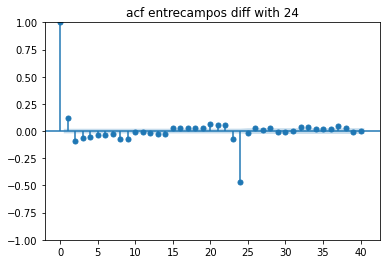

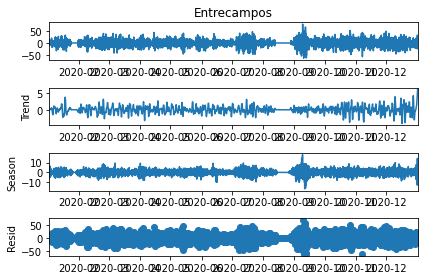

In [82]:
#entrecampos differencing 24
entrecampos = entrecampos.diff(24)
entrecampos = entrecampos[24:]
plt.plot(data.index, data['Entrecampos'], color='red')
plt.plot(entrecampos)

#pacf, acf plots
plot_pacf(entrecampos, title='pacf entrcampos diff with 24')
plot_acf(entrecampos, title='acf entrecampos diff with 24')
#decomposition plot
res = STL(entrecampos).fit()
res.plot()
plt.show()